# **🚗 Exploratory Data Analysis (EDA): EV Energy Efficiency Dataset**

## **📌 Introduction**

Electric Vehicles (EVs) are at the core of the global transition toward **sustainable transportation**. Understanding the factors that influence **energy efficiency** is critical for manufacturers, policymakers, and consumers aiming to optimize performance, reduce charging costs, and minimize environmental impact.

In this notebook, we perform a **comprehensive Exploratory Data Analysis (EDA)** on an **EV Energy Efficiency dataset** containing specifications of **1,197 battery electric vehicles** manufactured between **2012 and 2026**. The dataset includes a mix of **temporal, categorical, and technical features**, along with a target variable measuring **energy efficiency (km/kWh)**.

---

## **🎯 Objectives of This Analysis**

The primary goals of this notebook are to:

- 🔍 Understand the **structure, quality, and characteristics** of the dataset  
- 📊 Explore **patterns, trends, and distributions** across EV specifications  
- 🔗 Analyze relationships between **motor power, recharge time, vehicle class, and energy efficiency**  
- ⚠️ Detect **outliers and anomalies** and assess their business relevance  
- 🧠 Engineer meaningful features to enhance **model readiness**  
- 📈 Prepare the dataset for **regression, clustering, or classification tasks**

---

## **🧪 Type of Analysis Performed**

This notebook follows a **structured, end-to-end EDA pipeline**, including:

- **Descriptive Analysis** → Understanding distributions and summary statistics  
- **Diagnostic Analysis** → Identifying relationships, correlations, and anomalies  
- **Predictive Readiness Analysis** → Feature engineering, transformations, and scaling  

The dataset is primarily suited for **regression modeling**, with optional transformation into a **classification problem** by binning energy efficiency levels.

---

## **🛠️ Tools & Libraries Used**

The analysis is conducted using Python with the following libraries:

- **Pandas & NumPy** → Data manipulation and numerical operations  
- **Matplotlib & Seaborn** → High-quality static visualizations  
- **Scikit-learn** → Scaling, PCA, clustering, and feature engineering  
- **SciPy** → Statistical analysis and distribution checks  

---

## **🧭 EDA Roadmap**

This notebook systematically walks through:

1. Understanding the dataset context  
2. Data loading and inspection  
3. Cleaning and preprocessing  
4. Univariate, bivariate, and multivariate analysis  
5. Outlier detection and treatment decisions  
6. Feature engineering and transformations  
7. Distribution and imbalance checks  

Each step is supported by **clear visualizations, statistical reasoning, and domain-driven insights**, ensuring the analysis is both **technically sound and practically meaningful**.

---

📌 *By the end of this notebook, the dataset will be fully explored, well-understood, and ready for downstream machine learning or advanced analytical tasks.*


# **1️⃣ Understand the Context of the Dataset**

### **🚗 About the Dataset**
The **EV Energy Efficiency Dataset** provides comprehensive specifications for **1,197 battery electric vehicles (EVs)** spanning **2012 to 2026**. It includes **7 key columns** capturing temporal, categorical, and technical features, sourced from Canadian government data.  

This dataset is **production-ready** and can be used for advanced analysis such as:  
- **EV efficiency prediction** through regression models  
- **Manufacturer comparison analysis** (Tesla, Nissan, BMW, etc.)  
- **Temporal trend evaluation** from 2012–2026  
- **Feature importance and model optimization** in machine learning  
- **Anomaly detection** for efficiency outliers  
- **Statistical benchmarking** across vehicle classes  

---

### **📋 Dataset Overview**
| Property | Value |
|----------|-------|
| **Time Period** | 2012 - 2026 |
| **Total Duration** | 15 years |
| **Granularity** | Annual model data |
| **Total Records** | 1,197 samples |
| **Total Features** | 7 columns (6 features + 1 target) |
| **Data Quality** | 100% complete (0 missing values) |
| **Language** | English |
| **Format** | CSV (UTF-8 encoding) |

---

### **🗂️ Features & Columns**
| # | Column Name | Type | Range | Description |
|---|-------------|------|-------|-------------|
| 1 | Model year | Integer | 2012-2026 | Manufacturing year |
| 2 | Make | Categorical | 37 manufacturers | Vehicle manufacturer (Tesla, Nissan, BMW…) |
| 3 | Model | Categorical | 590 models | Specific vehicle model |
| 4 | Vehicle class | Categorical | 10 classes | Size category (Subcompact, Mid-size…) |
| 5 | Motor (kW) | Float | 35-930 kW | Motor power rating |
| 6 | Recharge time (h) | Float | 3-18.6 hours | Full charge duration |
| 7 | Energy Efficiency (km/kWh) | Float | 2.11-6.94 | Target variable: Distance per kWh |

---

### **🎯 Purpose of the Analysis**
This dataset allows **data scientists** to explore EV energy efficiency trends, compare manufacturers, evaluate vehicle classes, and build **predictive models** for energy efficiency. It also supports **machine learning applications**, including regression, anomaly detection, feature analysis, and optimization of EV design parameters.  

---

### **🔍 Key Context Insights**
- Tesla vehicles dominate the dataset, representing **28.2% of records**.  
- Energy efficiency ranges from **2.11 to 6.94 km/kWh**, providing a wide spectrum for regression and benchmarking.  
- All records are **complete**, eliminating the need for missing value imputation.  
- The dataset combines **temporal, categorical, and numerical features**, making it suitable for **multivariate analysis**.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **2️⃣ Data Collection and Loading**

In [2]:
df = pd.read_csv("/kaggle/input/ev-energy-efficiency-dataset/EV Energy Efficiency Dataset.csv")

# **3️⃣ Initial Data Inspection**

In [3]:
df.head()

Model year        Make           Model Vehicle class  Motor (kW)  \
0        2012  Mitsubishi          i-MiEV    Subcompact          49   
1        2012      Nissan            LEAF      Mid-size          80   
2        2013        Ford  Focus Electric       Compact         107   
3        2013  Mitsubishi          i-MiEV    Subcompact          49   
4        2013      Nissan            LEAF      Mid-size          80   

   Recharge time (h)  Energy Efficiency (km/kWh)  
0                7.0                    5.347594  
1                7.0                    4.739336  
2                4.0                    5.000000  
3                7.0                    5.347594  
4                7.0                    4.739336

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model year                  1197 non-null   int64  
 1   Make                        1197 non-null   object 
 2   Model                       1197 non-null   object 
 3   Vehicle class               1197 non-null   object 
 4   Motor (kW)                  1197 non-null   int64  
 5   Recharge time (h)           1197 non-null   float64
 6   Energy Efficiency (km/kWh)  1197 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 65.6+ KB


In [5]:
df.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Motor (kW)',
       'Recharge time (h)', 'Energy Efficiency (km/kWh)'],
      dtype='object')

In [6]:
df.dtypes

Model year                      int64
Make                           object
Model                          object
Vehicle class                  object
Motor (kW)                      int64
Recharge time (h)             float64
Energy Efficiency (km/kWh)    float64
dtype: object

In [7]:
df.describe()

Model year   Motor (kW)  Recharge time (h)  Energy Efficiency (km/kWh)
count  1197.000000  1197.000000        1197.000000                 1197.000000
mean   2023.231412   341.289891          10.547285                    4.453765
std       2.881857   152.722951           2.706302                    0.856691
min    2012.000000    35.000000           3.000000                    2.114165
25%    2022.000000   230.000000           8.500000                    3.787879
50%    2024.000000   335.000000          10.500000                    4.366812
75%    2025.000000   420.000000          12.000000                    5.102041
max    2026.000000   930.000000          18.600000                    6.944444

In [8]:
df['Model year'].value_counts()

Model year
2025    279
2024    224
2026    224
2023    159
2022     82
2021     49
2020     40
2019     35
2016     27
2017     23
2018     21
2015     14
2013      9
2014      9
2012      2
Name: count, dtype: int64

In [9]:
df['Make'].nunique()

37

In [10]:
df['Model'].nunique()

590

In [11]:
df['Vehicle class'].value_counts()

Vehicle class
Sport utility vehicle: Standard    311
Sport utility vehicle: Small       236
Full-size                          167
Pickup truck: Standard             129
Mid-size                           128
Compact                             93
Station wagon: Small                60
Subcompact                          50
Two-seater                          12
Station wagon: Mid-size              4
Minivan                              4
Minicompact                          3
Name: count, dtype: int64

# **4️⃣ Data Cleaning & Preprocessing**

### **Check Missing Values**

Model year                    0
Make                          0
Model                         0
Vehicle class                 0
Motor (kW)                    0
Recharge time (h)             0
Energy Efficiency (km/kWh)    0
dtype: int64


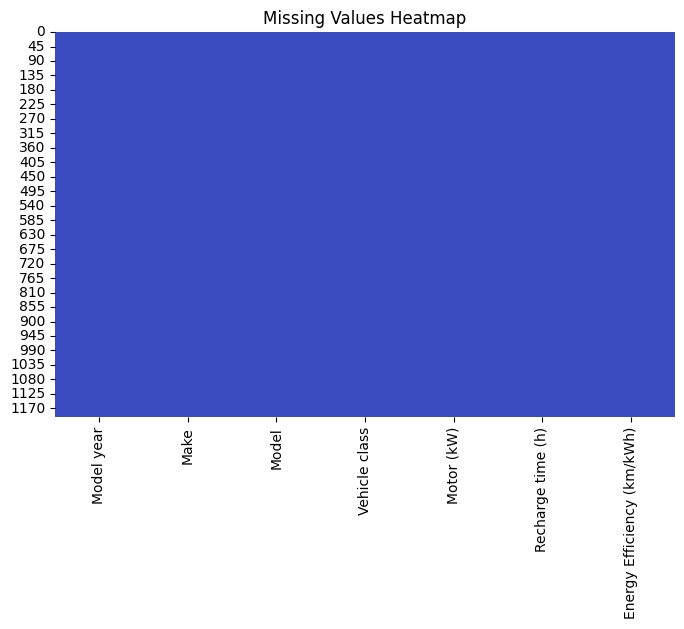

In [12]:
missing = df.isnull().sum()
print(missing)

plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap")
plt.show()

### **Detecting Duplicates**

Total duplicate rows: 0


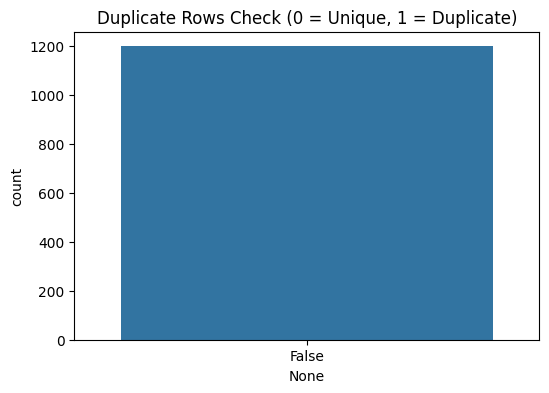

In [13]:
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")
df = df.drop_duplicates()

plt.figure(figsize=(6,4))
sns.countplot(x=df.duplicated())
plt.title("Duplicate Rows Check (0 = Unique, 1 = Duplicate)")
plt.show()

### **Check numerical and categorical columns:**

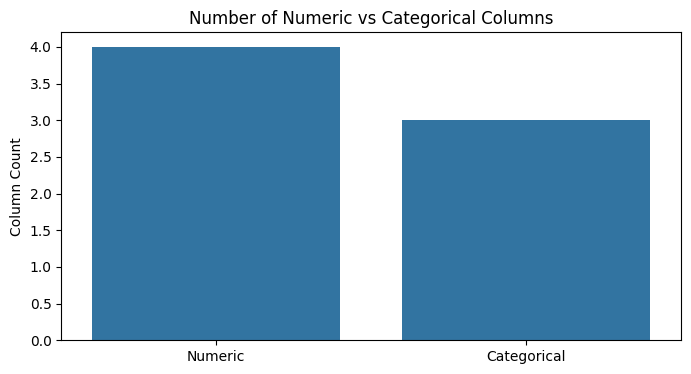

In [14]:
df.dtypes

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(8,4))
sns.barplot(x=['Numeric','Categorical'], y=[len(numeric_cols), len(categorical_cols)])
plt.title("Number of Numeric vs Categorical Columns")
plt.ylabel("Column Count")
plt.show()

### **Consistency Checks**

- Model year: Should be within 2012–2026
- Vehicle class: Standardized across categories
- Make: Manufacturer names consistent

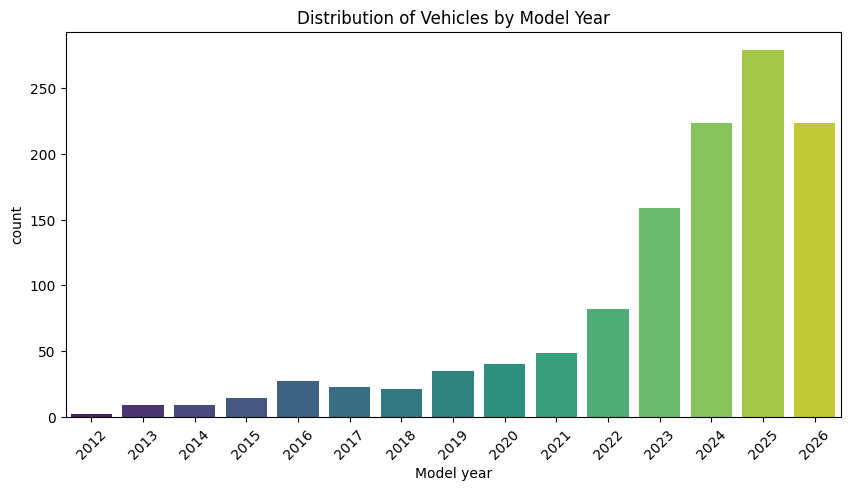

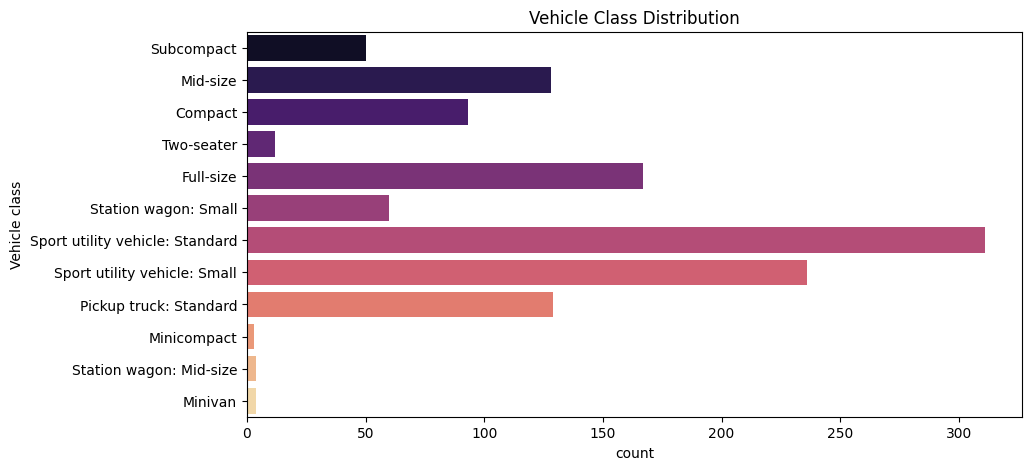

In [15]:
# Model year distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Model year', data=df, palette='viridis')
plt.title("Distribution of Vehicles by Model Year")
plt.xticks(rotation=45)
plt.show()

# Vehicle class distribution
plt.figure(figsize=(10,5))
sns.countplot(y='Vehicle class', data=df, palette='magma')
plt.title("Vehicle Class Distribution")
plt.show()

# **5️⃣ Univariate Analysis5️**

## **🧮 1. Numerical Columns**

The numerical columns are:  
- Model year  
- Motor (kW) 
- Recharge time (h) 
- Energy Efficiency (km/kWh)

We will explore their distributions and statistics.

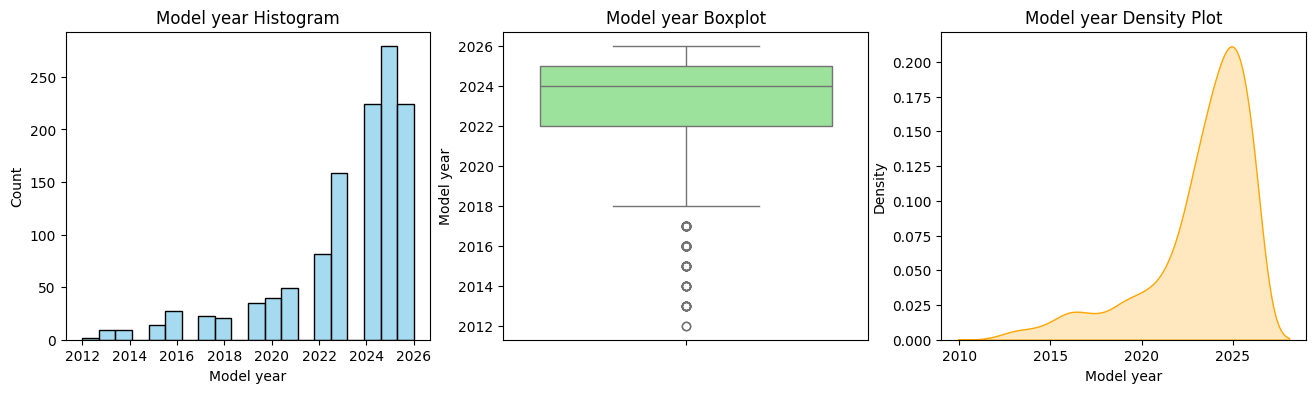

📊 Model year Statistics:
 count    1197.000000
mean     2023.231412
std         2.881857
min      2012.000000
25%      2022.000000
50%      2024.000000
75%      2025.000000
max      2026.000000
Name: Model year, dtype: float64 



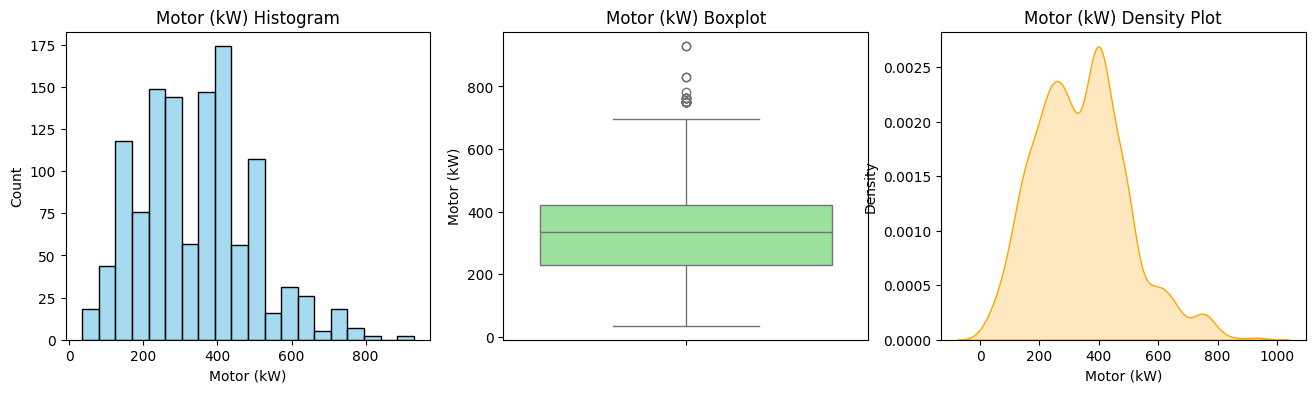

📊 Motor (kW) Statistics:
 count    1197.000000
mean      341.289891
std       152.722951
min        35.000000
25%       230.000000
50%       335.000000
75%       420.000000
max       930.000000
Name: Motor (kW), dtype: float64 



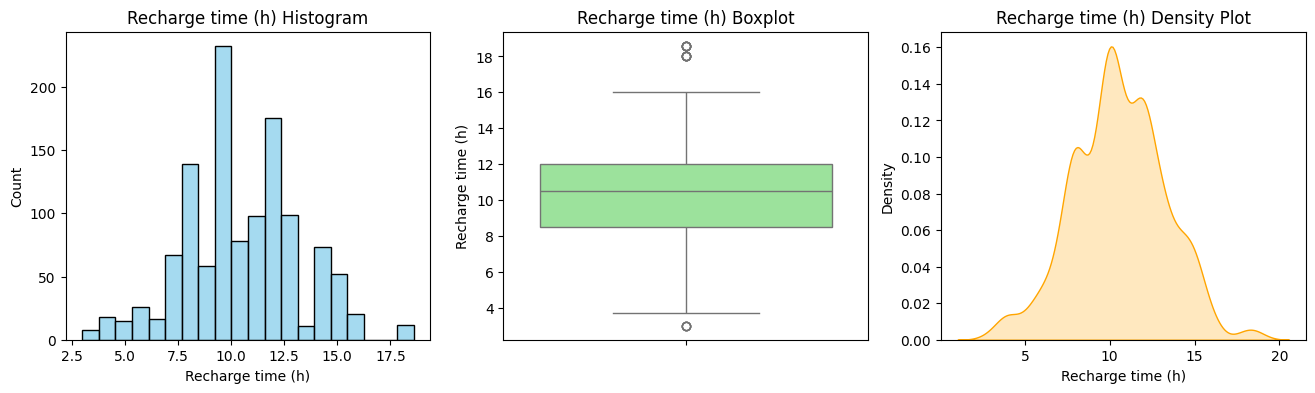

📊 Recharge time (h) Statistics:
 count    1197.000000
mean       10.547285
std         2.706302
min         3.000000
25%         8.500000
50%        10.500000
75%        12.000000
max        18.600000
Name: Recharge time (h), dtype: float64 



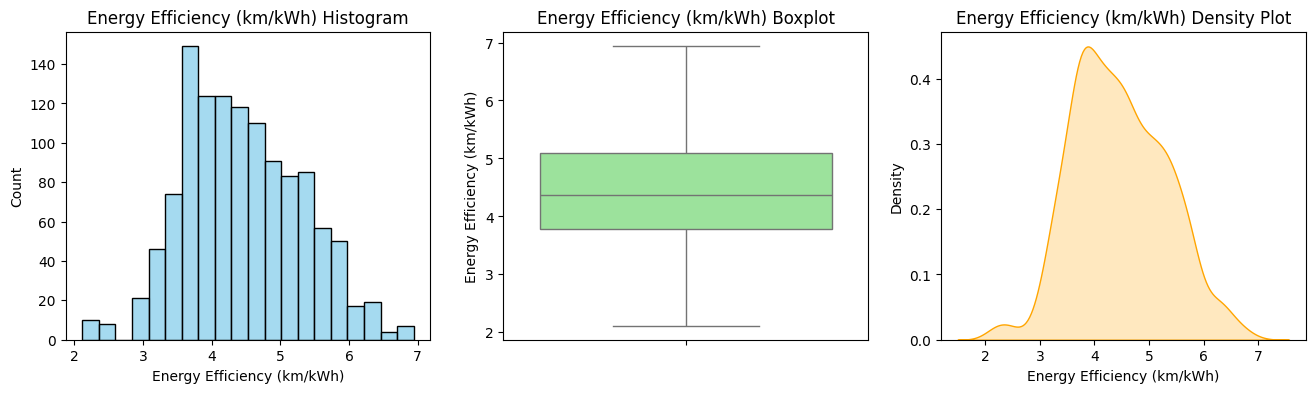

📊 Energy Efficiency (km/kWh) Statistics:
 count    1197.000000
mean        4.453765
std         0.856691
min         2.114165
25%         3.787879
50%         4.366812
75%         5.102041
max         6.944444
Name: Energy Efficiency (km/kWh), dtype: float64 



In [16]:
numeric_cols = ['Model year', 'Motor (kW)', 'Recharge time (h)', 'Energy Efficiency (km/kWh)']

for col in numeric_cols:
    plt.figure(figsize=(16,4))
    
    # Histogram
    plt.subplot(1,3,1)
    sns.histplot(df[col], kde=False, bins=20, color='skyblue')
    plt.title(f'{col} Histogram')
    
    # Boxplot
    plt.subplot(1,3,2)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'{col} Boxplot')
    
    # Density Plot
    plt.subplot(1,3,3)
    sns.kdeplot(df[col], shade=True, color='orange')
    plt.title(f'{col} Density Plot')
    
    plt.show()
    
    print(f"📊 {col} Statistics:\n", df[col].describe(), "\n")

## **🏷️ 2. Categorical Columns**

The categorical columns are:

- Make
- Model
- Vehicle class

We will visualize their distributions and frequencies.

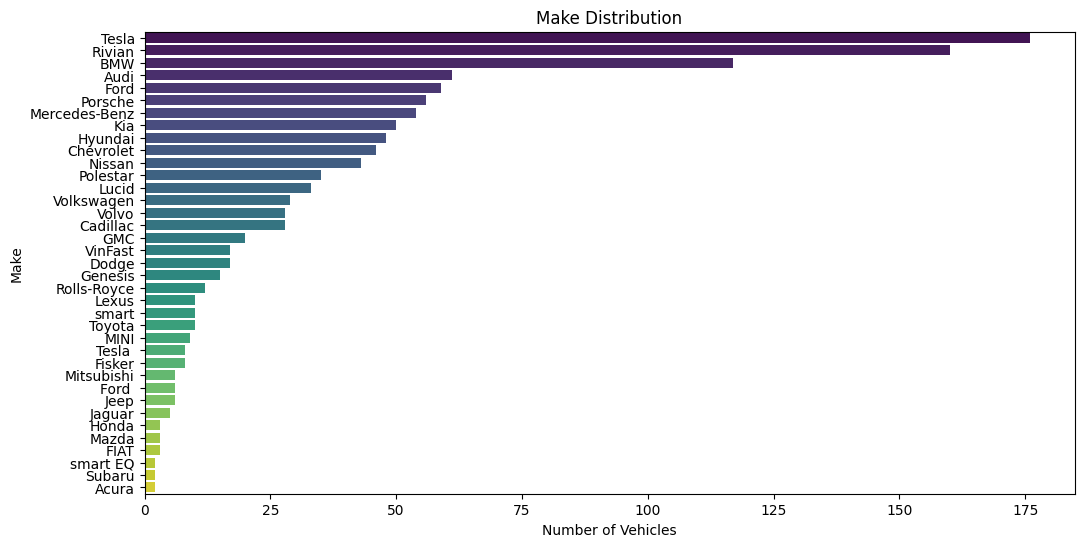

📊 Make Frequency Table:
 Make
Tesla            176
Rivian           160
BMW              117
Audi              61
Ford              59
Porsche           56
Mercedes-Benz     54
Kia               50
Hyundai           48
Chevrolet         46
Nissan            43
Polestar          35
Lucid             33
Volkswagen        29
Volvo             28
Cadillac          28
GMC               20
VinFast           17
Dodge             17
Genesis           15
Rolls-Royce       12
Lexus             10
smart             10
Toyota            10
MINI               9
Tesla              8
Fisker             8
Mitsubishi         6
Ford               6
Jeep               6
Jaguar             5
Honda              3
Mazda              3
FIAT               3
smart EQ           2
Subaru             2
Acura              2
Name: count, dtype: int64 



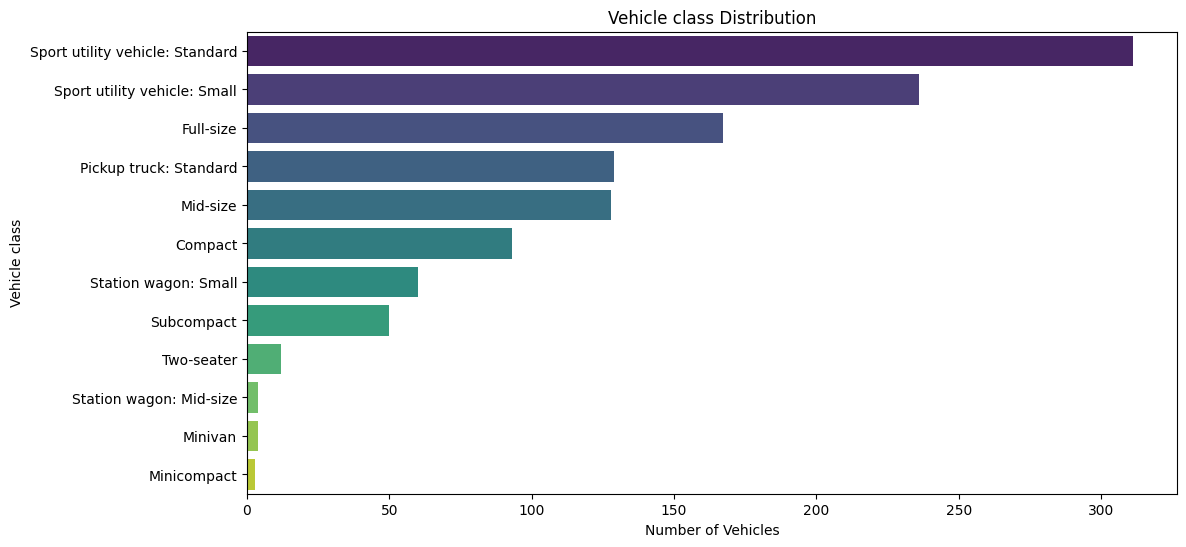

📊 Vehicle class Frequency Table:
 Vehicle class
Sport utility vehicle: Standard    311
Sport utility vehicle: Small       236
Full-size                          167
Pickup truck: Standard             129
Mid-size                           128
Compact                             93
Station wagon: Small                60
Subcompact                          50
Two-seater                          12
Station wagon: Mid-size              4
Minivan                              4
Minicompact                          3
Name: count, dtype: int64 



In [17]:
categorical_cols = ['Make', 'Vehicle class']

for col in categorical_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(y=col, data=df, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xlabel('Number of Vehicles')
    plt.ylabel(col)
    plt.show()
    
    # Display frequency table
    print(f"📊 {col} Frequency Table:\n", df[col].value_counts(), "\n")

# **6️⃣ Bivariate Analysis**

## **🔢 1. Numerical vs Numerical**

Numerical columns: Model year, Motor (kW), Recharge time (h), Energy Efficiency (km/kWh)

### **📊 Correlation Matrix**


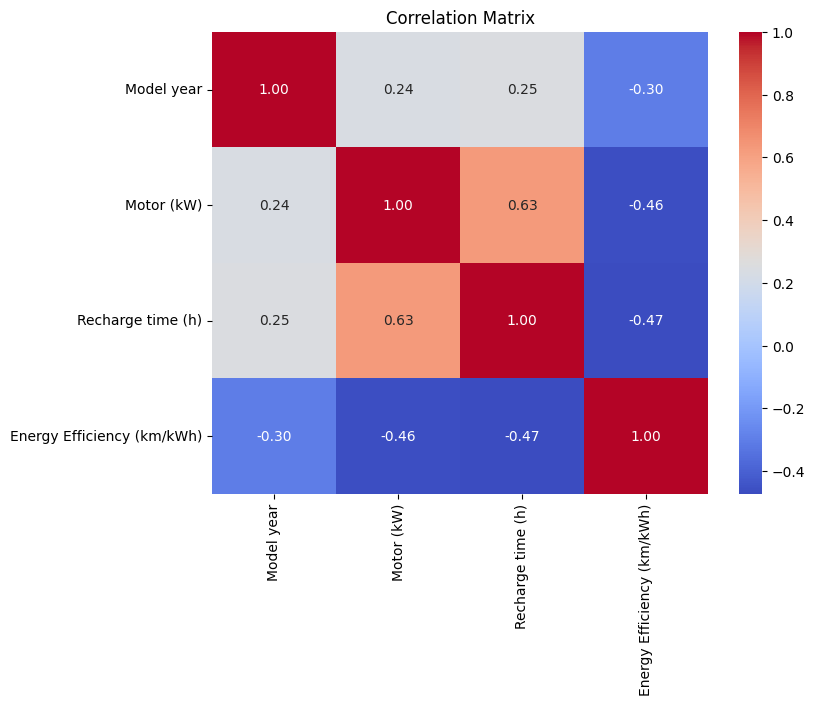

In [18]:
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### **✨ Pair Plot**

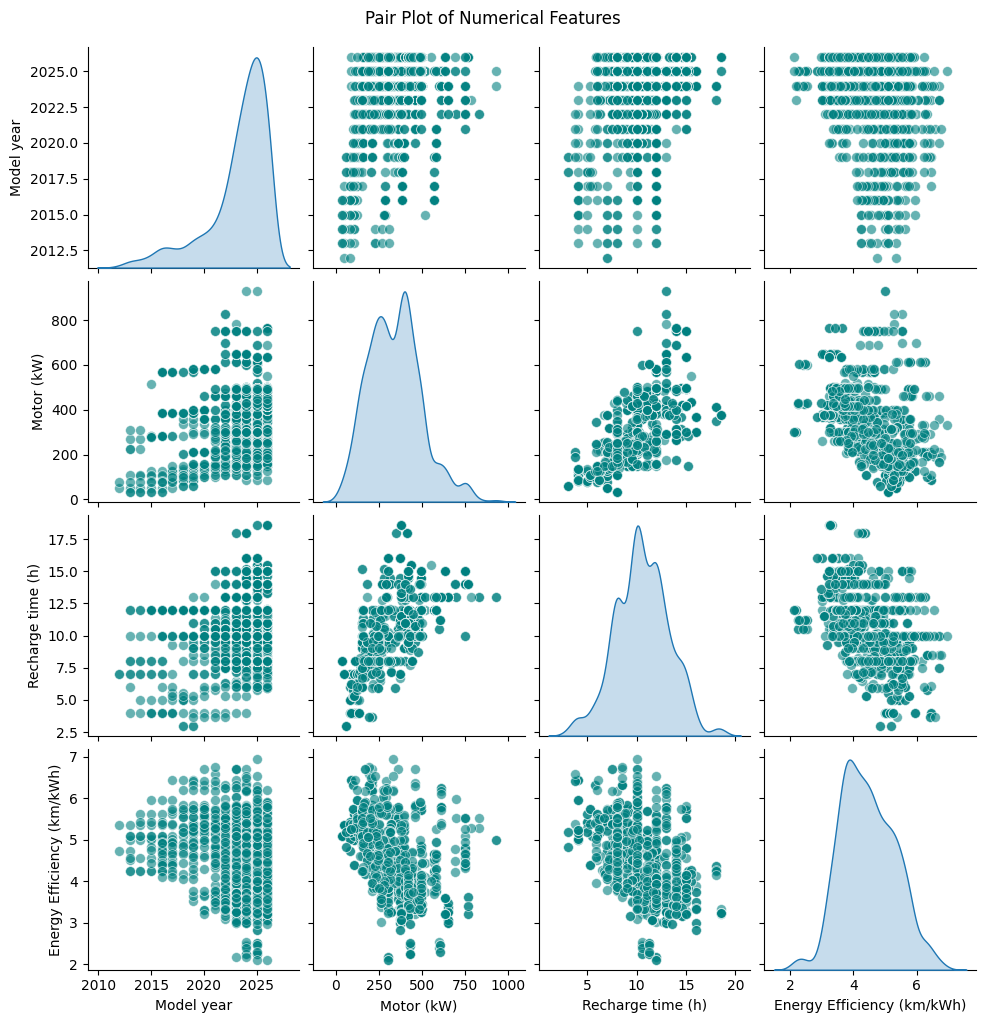

In [19]:
sns.pairplot(df[numeric_cols], kind='scatter', diag_kind='kde', plot_kws={'alpha':0.6, 's':50, 'color':'teal'})
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

### **🔹 Scatter Plots with Target**

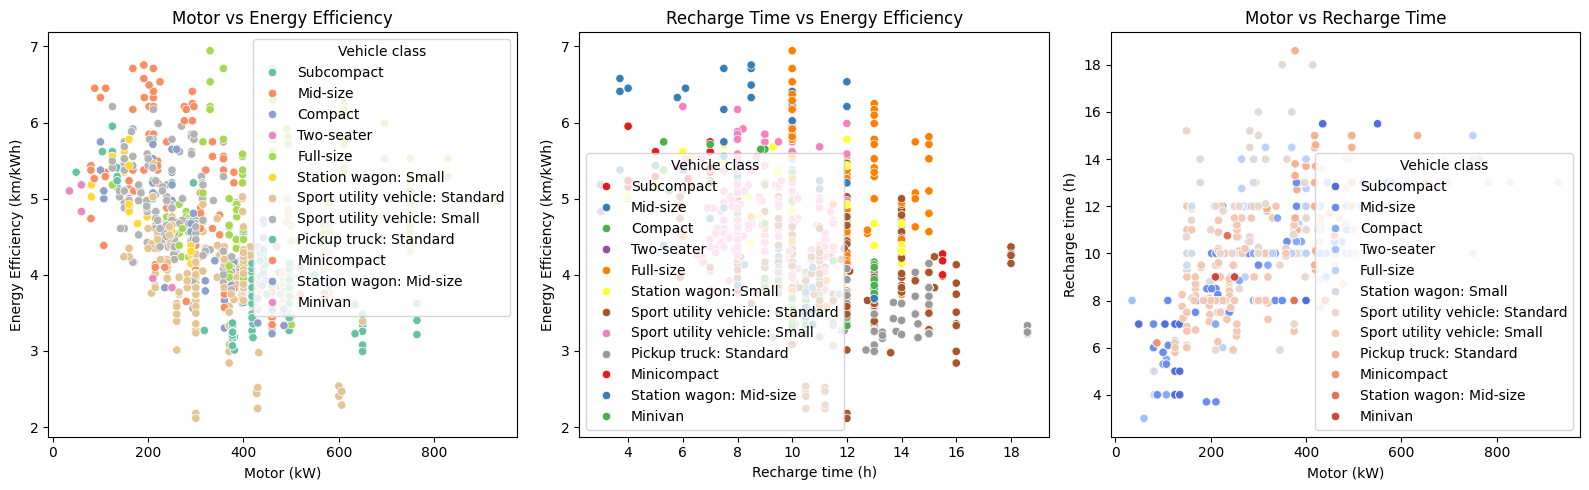

In [20]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.scatterplot(x='Motor (kW)', y='Energy Efficiency (km/kWh)', data=df, hue='Vehicle class', palette='Set2')
plt.title("Motor vs Energy Efficiency")

plt.subplot(1,3,2)
sns.scatterplot(x='Recharge time (h)', y='Energy Efficiency (km/kWh)', data=df, hue='Vehicle class', palette='Set1')
plt.title("Recharge Time vs Energy Efficiency")

plt.subplot(1,3,3)
sns.scatterplot(x='Motor (kW)', y='Recharge time (h)', data=df, hue='Vehicle class', palette='coolwarm')
plt.title("Motor vs Recharge Time")

plt.tight_layout()
plt.show()

## **🏷️ 2. Numerical vs Categorical**

### **Boxplots: Energy Efficiency by Vehicle Class**

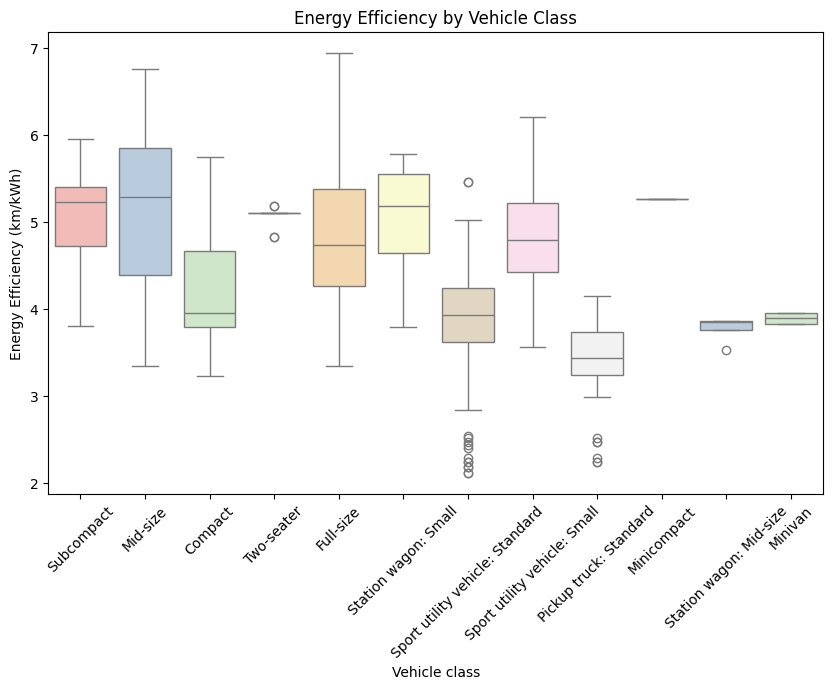

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Vehicle class', y='Energy Efficiency (km/kWh)', data=df, palette='Pastel1')
plt.title("Energy Efficiency by Vehicle Class")
plt.xticks(rotation=45)
plt.show()

### **Violin Plots: Energy Efficiency by Top 10 Makes**

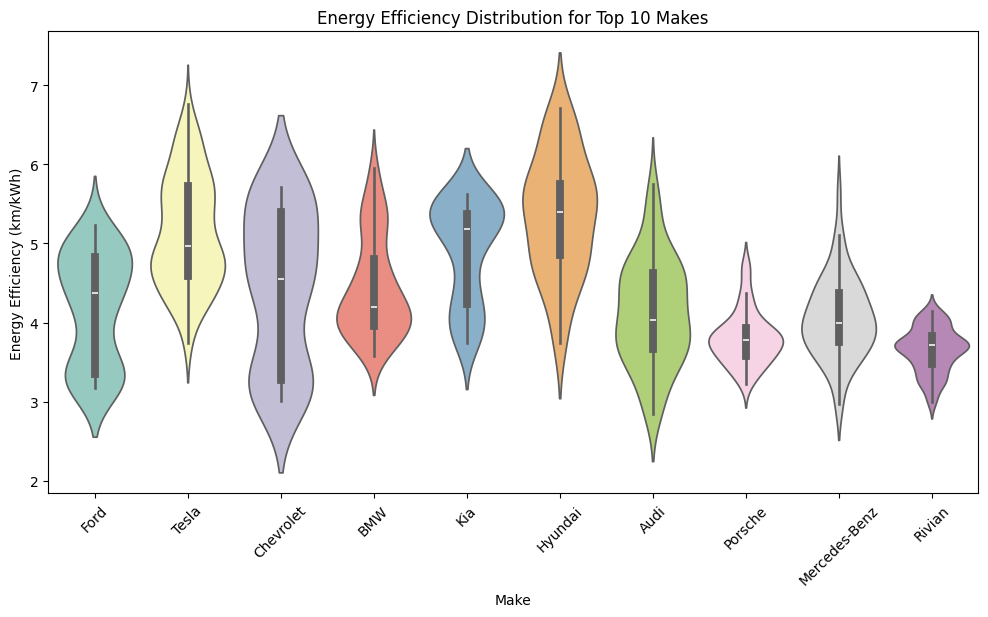

In [22]:
top_makes = df['Make'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.violinplot(x='Make', y='Energy Efficiency (km/kWh)', data=df[df['Make'].isin(top_makes)], palette='Set3')
plt.title("Energy Efficiency Distribution for Top 10 Makes")
plt.xticks(rotation=45)
plt.show()

### **Group-wise Aggregation**

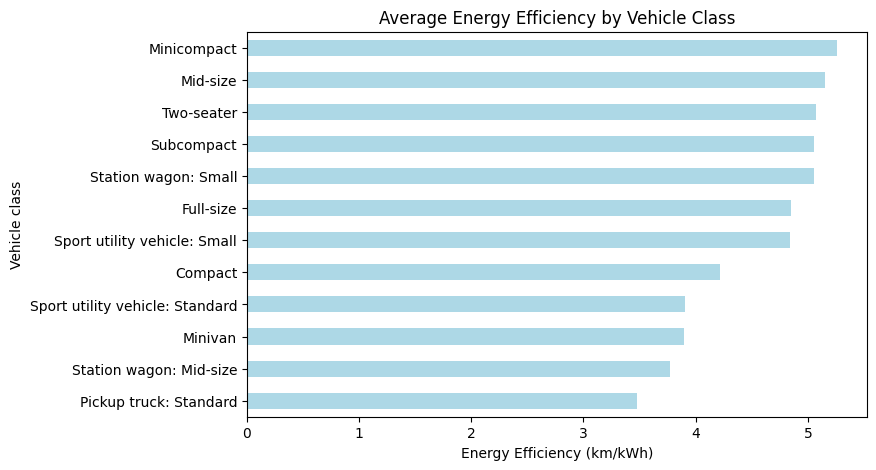

In [23]:
class_efficiency = df.groupby('Vehicle class')['Energy Efficiency (km/kWh)'].mean().sort_values()
class_efficiency.plot(kind='barh', figsize=(8,5), color='lightblue')
plt.title("Average Energy Efficiency by Vehicle Class")
plt.xlabel("Energy Efficiency (km/kWh)")
plt.show()

## **🏷️ 3. Categorical vs Categorical**

### **Contingency Table: Vehicle Class vs Make**

In [24]:
contingency = pd.crosstab(df['Vehicle class'], df['Make'])
contingency

Make                             Acura  Audi  BMW  Cadillac  Chevrolet  Dodge  \
Vehicle class                                                                   
Compact                              0     6   31         0          0      0   
Full-size                            0     4   18         0          0     17   
Mid-size                             0     0    0         0          0      0   
Minicompact                          0     0    0         0          0      0   
Minivan                              0     0    0         0          0      0   
Pickup truck: Standard               0     0    0         0         15      0   
Sport utility vehicle: Small         0     9    0        16         19      0   
Sport utility vehicle: Standard      2    36   38        10          0      0   
Station wagon: Mid-size              0     0    0         2          0      0   
Station wagon: Small                 0     0    0         0          9      0   
Subcompact                           0     6   30         0          3      0   
Two-seater                           0     0    0         0          0      0   

Make                             FIAT  Fisker  Ford  Ford   ...  Rolls-Royce  \
Vehicle class                                               ...                
Compact                             0       0     6      0  ...           12   
Full-size                           0       0     0      0  ...            0   
Mid-size                            0       0     0      0  ...            0   
Minicompact                         3       0     0      0  ...            0   
Minivan                             0       0     0      0  ...            0   
Pickup truck: Standard              0       0    20      0  ...            0   
Sport utility vehicle: Small        0       0    27      6  ...            0   
Sport utility vehicle: Standard     0       8     0      0  ...            0   
Station wagon: Mid-size             0       0     0      0  ...            0   
Station wagon: Small                0       0     6      0  ...            0   
Subcompact                          0       0     0      0  ...            0   
Two-seater                          0       0     0      0  ...            0   

Make                             Subaru  Tesla  Tesla   Toyota  VinFast  \
Vehicle class                                                             
Compact                               0      0       0       0        0   
Full-size                             0     71       1       0        0   
Mid-size                              0     39       0       0        0   
Minicompact                           0      0       0       0        0   
Minivan                               0      0       0       0        0   
Pickup truck: Standard                0      2       0       0        0   
Sport utility vehicle: Small          2     27       0      10        0   
Sport utility vehicle: Standard       0     37       7       0       17   
Station wagon: Mid-size               0      0       0       0        0   
Station wagon: Small                  0      0       0       0        0   
Subcompact                            0      0       0       0        0   
Two-seater                            0      0       0       0        0   

Make                             Volkswagen  Volvo  smart  smart EQ  
Vehicle class                                                        
Compact                                   4      0      0         0  
Full-size                                 0      0      0         0  
Mid-size                                  0      0      0         0  
Minicompact                               0      0      0         0  
Minivan                                   4      0      0         0  
Pickup truck: Standard                    0      0      0         0  
Sport utility vehicle: Small             21     24      0         0  
Sport utility vehicle: Standard           0      4      0      

### **Stacked Bar Plot**

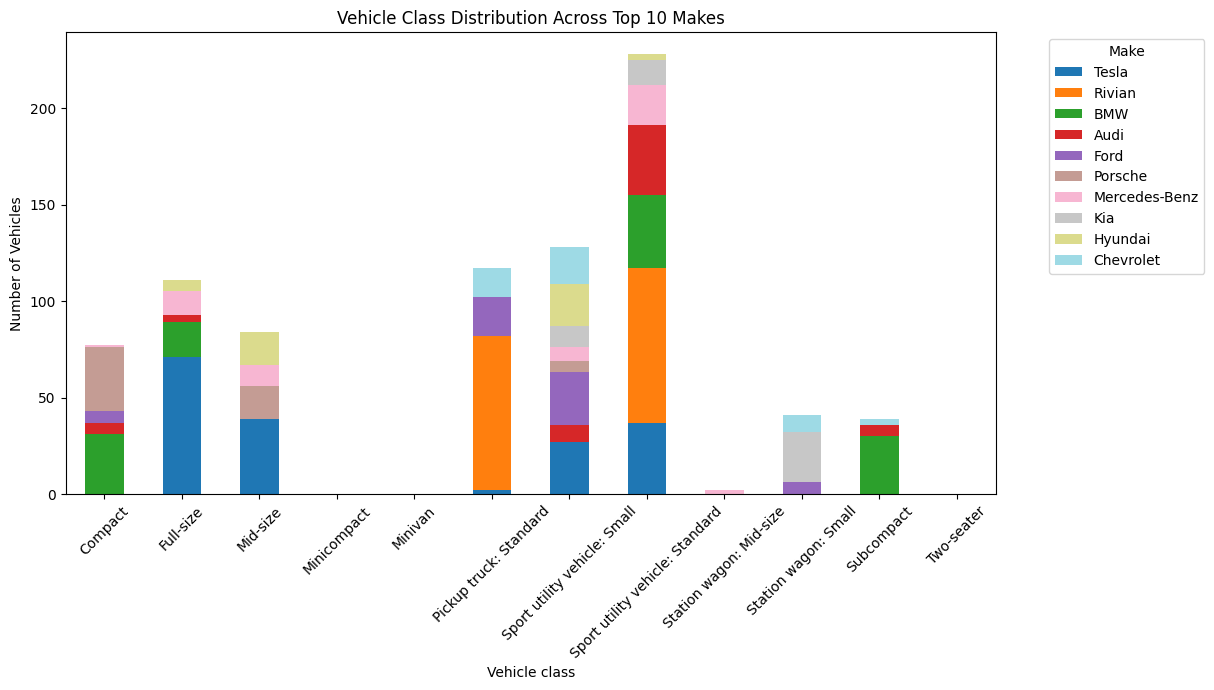

In [25]:
contingency_top = contingency[top_makes]  # Only top 10 makes for clarity
contingency_top.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Vehicle Class Distribution Across Top 10 Makes")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Heatmap of Contingency Table**

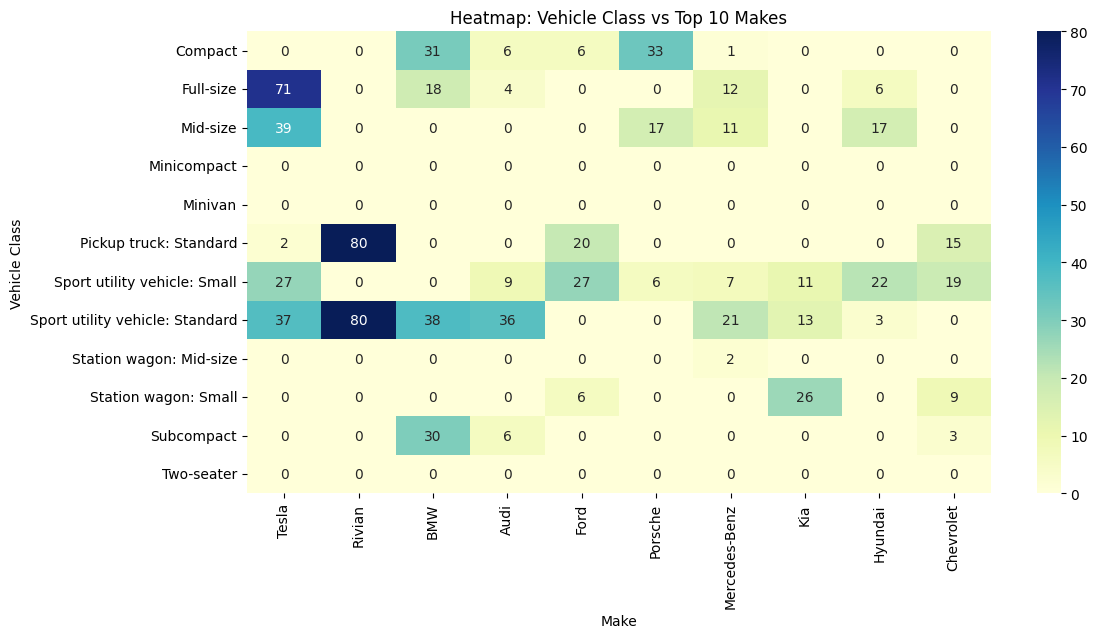

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(contingency_top, annot=True, fmt="d", cmap='YlGnBu')
plt.title("Heatmap: Vehicle Class vs Top 10 Makes")
plt.ylabel("Vehicle Class")
plt.xlabel("Make")
plt.show()

# **7️⃣ Multivariate Analysis**

## **🔗 1. Feature Correlation Matrix (Numerical Features)**

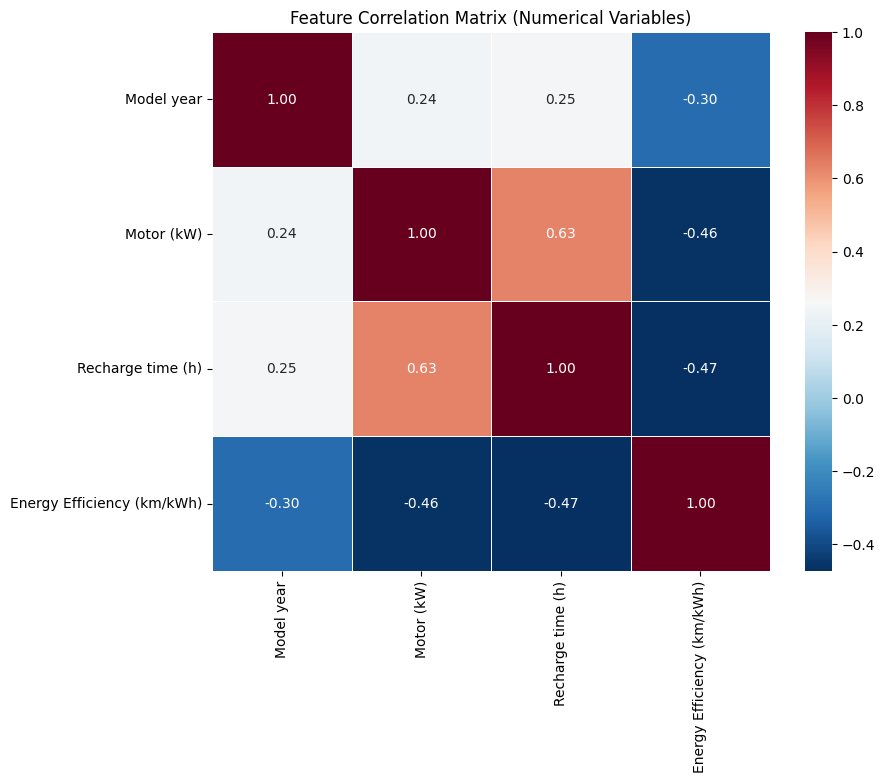

In [27]:
plt.figure(figsize=(9,7))
corr_matrix = df[numeric_cols].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="RdBu_r",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Feature Correlation Matrix (Numerical Variables)")
plt.show()

## **🔍 2. Pairplot (Multivariate Numerical Relationships)**

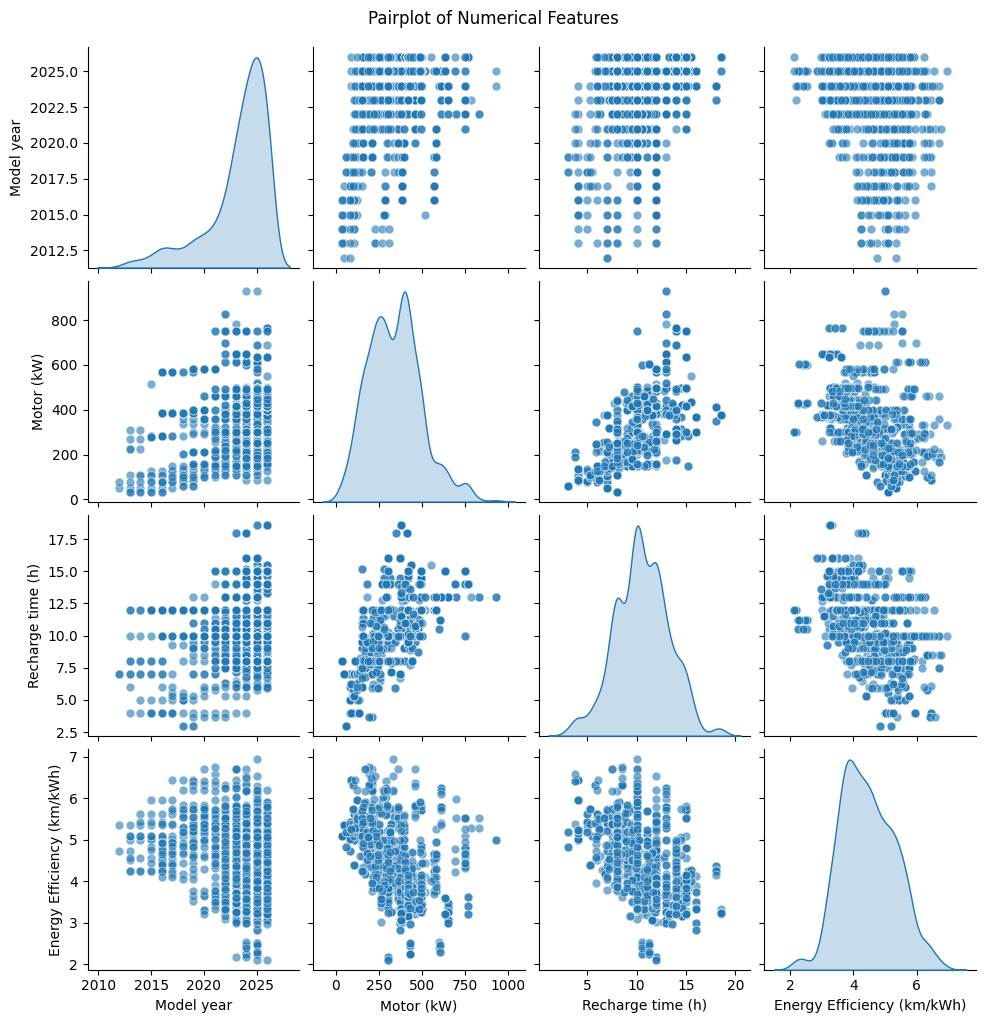

In [28]:
sns.pairplot(
    df[numeric_cols],
    diag_kind="kde",
    plot_kws={"alpha":0.6, "s":40}
)

plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

## **🧠 3. Principal Component Analysis (PCA)**

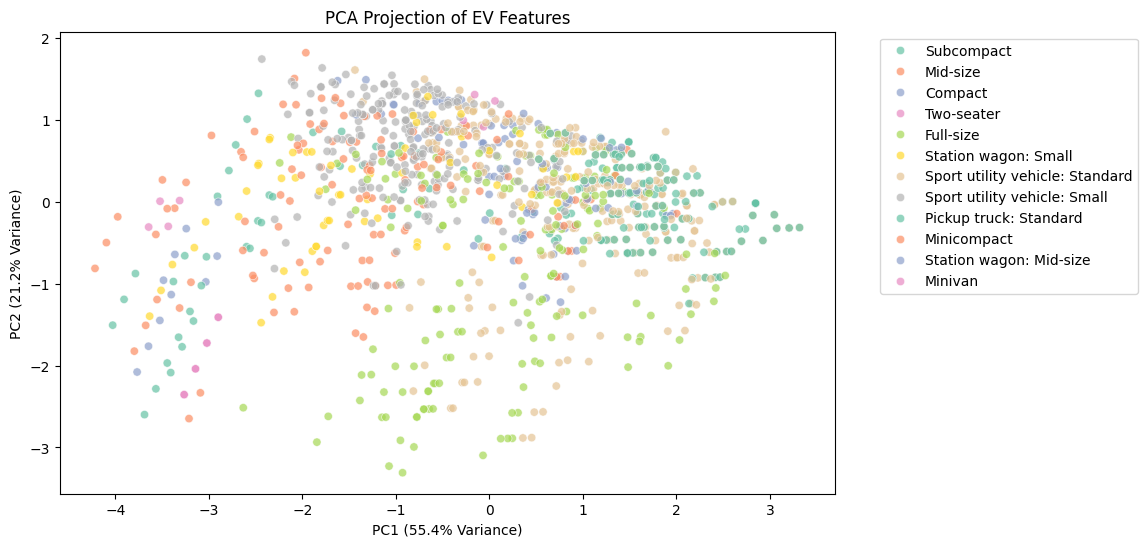

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create PCA DataFrame
pca_df = pd.DataFrame(
    pca_components,
    columns=["PC1", "PC2"]
)
pca_df["Vehicle class"] = df["Vehicle class"]

# Plot PCA
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Vehicle class",
    data=pca_df,
    palette="Set2",
    alpha=0.7
)

plt.title("PCA Projection of EV Features")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **🤖 4. Clustering Analysis (K-Means)**

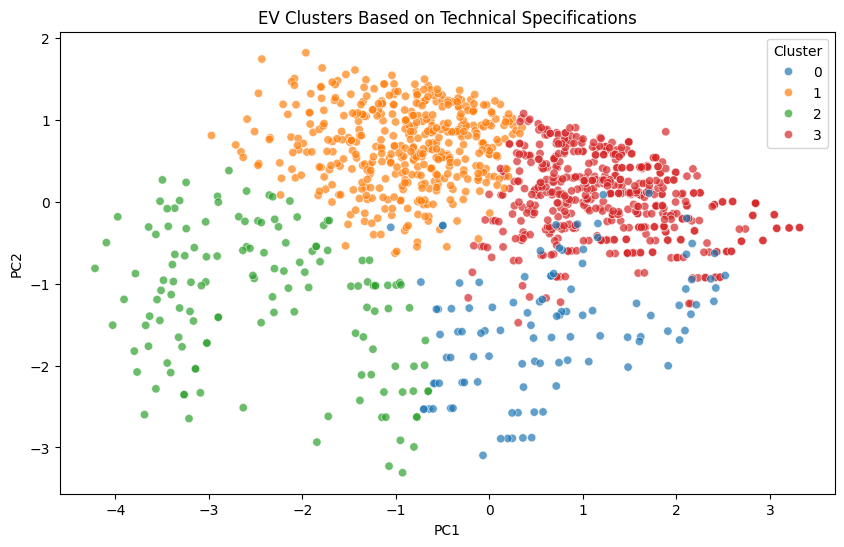

In [30]:
from sklearn.cluster import KMeans

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels
df["Cluster"] = clusters

# Visualize clusters using PCA projection
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=pca_df["PC1"],
    y=pca_df["PC2"],
    hue=df["Cluster"],
    palette="tab10",
    alpha=0.7
)

plt.title("EV Clusters Based on Technical Specifications")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## **🌡️ 5. Multivariate Heatmap (Vehicle Class vs Metrics)**

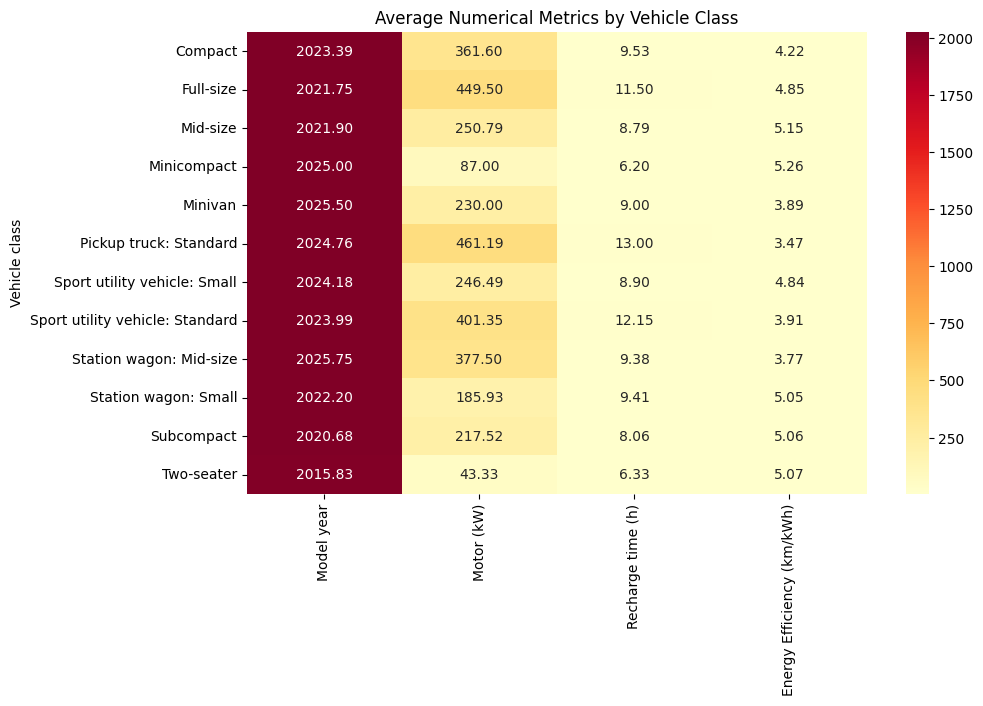

In [31]:
class_summary = df.groupby("Vehicle class")[numeric_cols].mean()

plt.figure(figsize=(10,6))
sns.heatmap(
    class_summary,
    annot=True,
    cmap="YlOrRd",
    fmt=".2f"
)

plt.title("Average Numerical Metrics by Vehicle Class")
plt.show()

# **8️⃣ Outlier Detection**

## **📦 1. Boxplots (Visual Outlier Detection)**

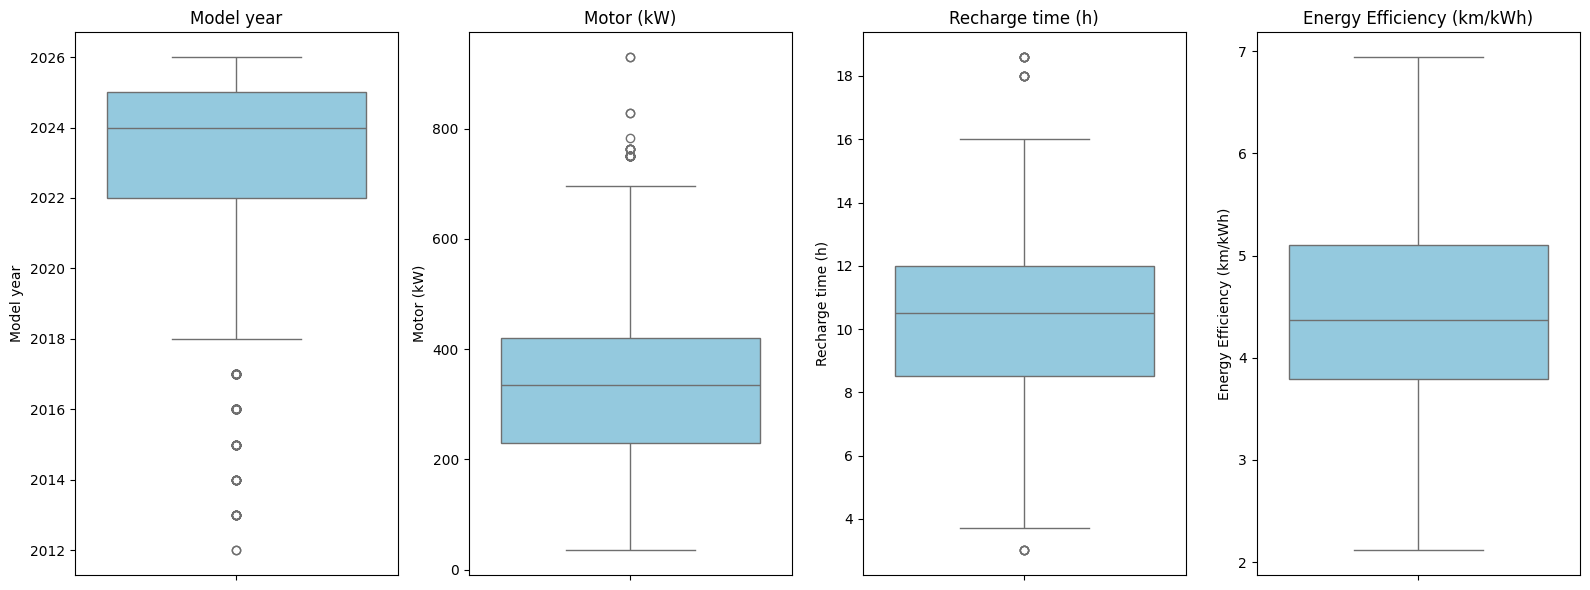

In [32]:
plt.figure(figsize=(16,6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

## **📐 2. IQR Method (Statistical Detection)**

In [33]:
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary

{'Model year': 84,
 'Motor (kW)': 29,
 'Recharge time (h)': 16,
 'Energy Efficiency (km/kWh)': 0}

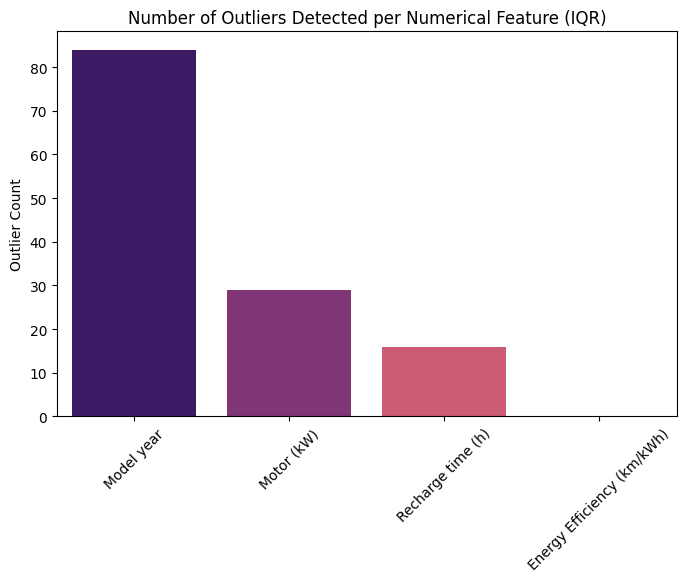

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=list(outlier_summary.keys()),
    y=list(outlier_summary.values()),
    palette="magma"
)

plt.title("Number of Outliers Detected per Numerical Feature (IQR)")
plt.ylabel("Outlier Count")
plt.xticks(rotation=45)
plt.show()

## **📈 3. Z-Score Method (Standard Deviation Based)**

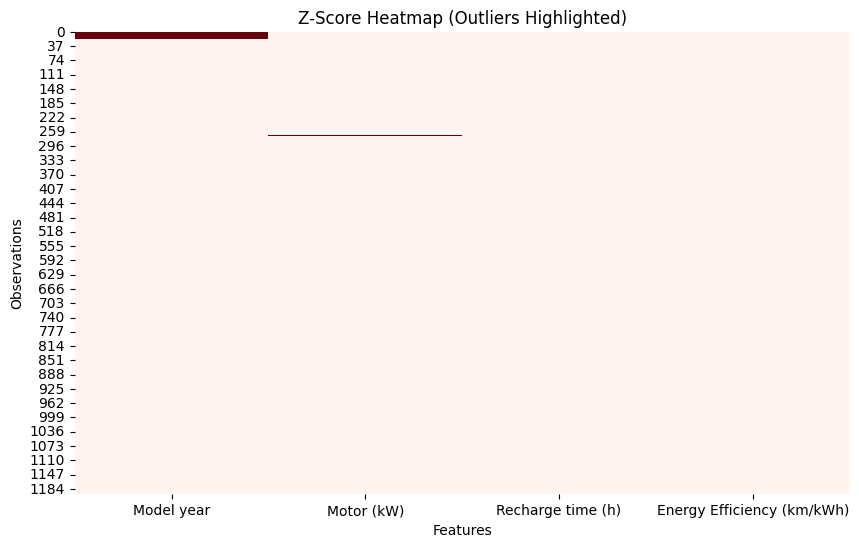

In [35]:
from scipy.stats import zscore

z_scores = df[numeric_cols].apply(zscore)

plt.figure(figsize=(10,6))
sns.heatmap(
    (abs(z_scores) > 3),
    cmap="Reds",
    cbar=False
)

plt.title("Z-Score Heatmap (Outliers Highlighted)")
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()

## **🎯 4. Outliers vs Energy Efficiency (Contextual Visualization)**

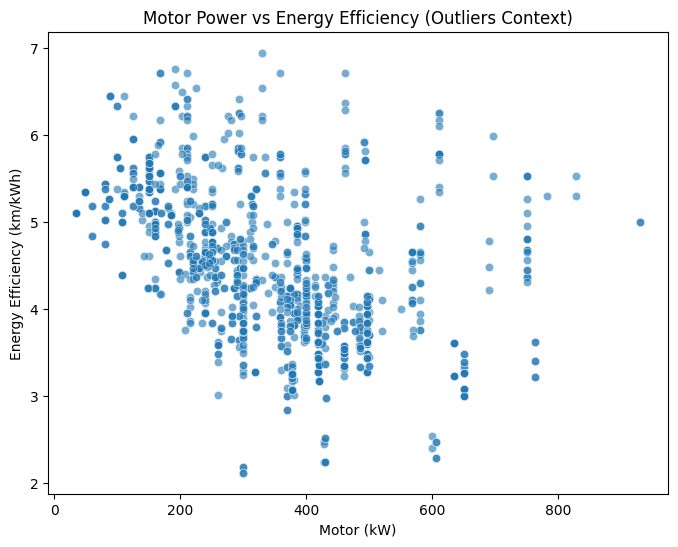

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Motor (kW)",
    y="Energy Efficiency (km/kWh)",
    data=df,
    alpha=0.6
)

plt.title("Motor Power vs Energy Efficiency (Outliers Context)")
plt.show()

# **9️⃣ Feature Engineering & Transformation**

## **🧪 1. Creating New Features**

### **🔹 a) Power-to-Efficiency Ratio**
This captures how much motor power is required per unit of energy efficiency.

In [37]:
df["Power_Efficiency_Ratio"] = df["Motor (kW)"] / df["Energy Efficiency (km/kWh)"]

### **🔹 b) Charging Speed (kW per hour proxy)**
A proxy metric to represent charging performance.

In [38]:
df["Charging_Speed_Index"] = df["Motor (kW)"] / df["Recharge time (h)"]

### **🔹 c) Vehicle Age (Relative to Latest Model Year)**

In [39]:
df["Vehicle_Age"] = df["Model year"].max() - df["Model year"]

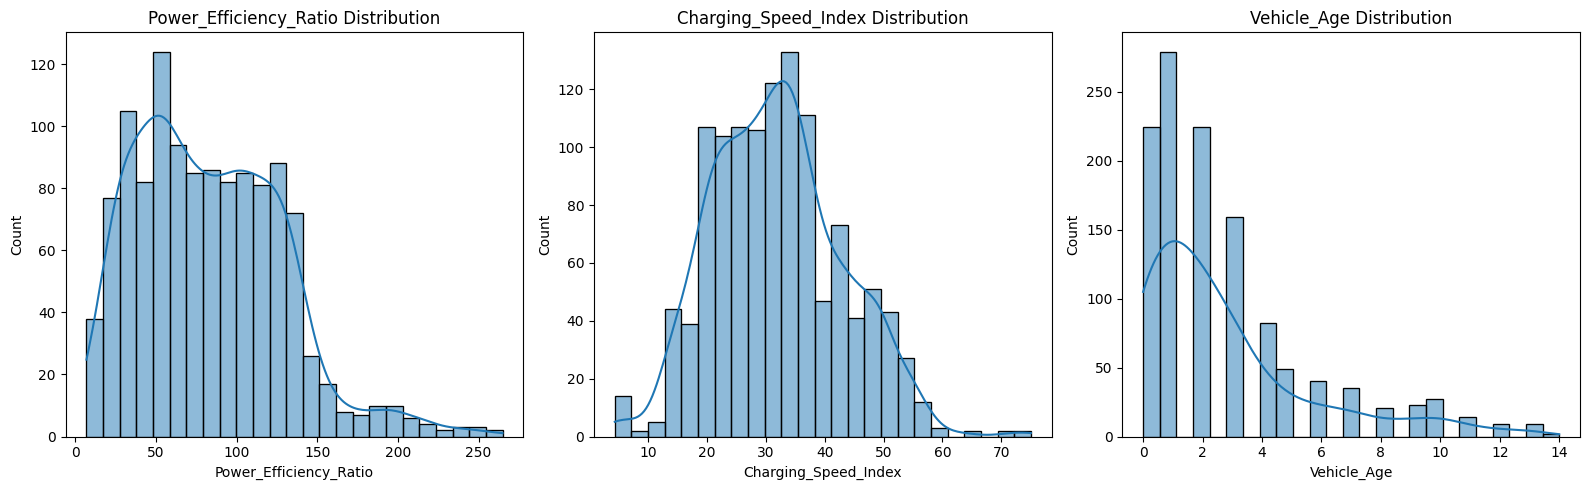

In [40]:
new_features = ["Power_Efficiency_Ratio", "Charging_Speed_Index", "Vehicle_Age"]

plt.figure(figsize=(16,5))
for i, col in enumerate(new_features, 1):
    plt.subplot(1,3,i)
    sns.histplot(df[col], kde=True, bins=25)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

## **🔁 2. Transformations for Skewed Data**

### **📐 a) Log Transformation**

In [41]:
df["Log_Motor_kW"] = np.log1p(df["Motor (kW)"])

### **📐 b) Square Root Transformation**

In [42]:
df["Sqrt_Recharge_Time"] = np.sqrt(df["Recharge time (h)"])

### **📊 Before vs After Comparison**

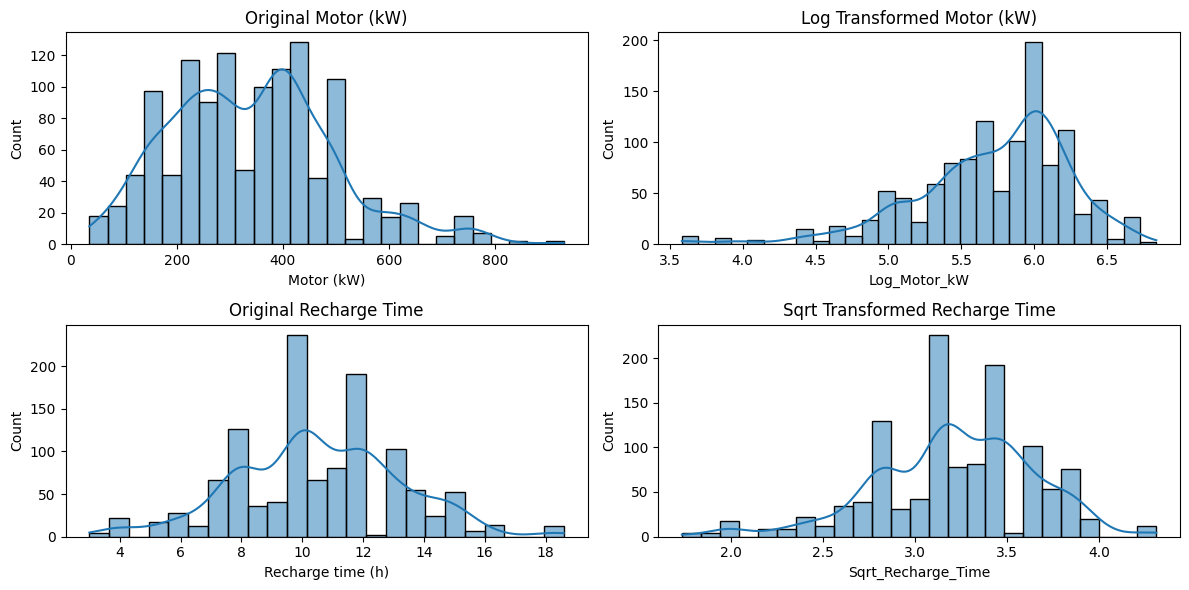

In [43]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.histplot(df["Motor (kW)"], kde=True)
plt.title("Original Motor (kW)")

plt.subplot(2,2,2)
sns.histplot(df["Log_Motor_kW"], kde=True)
plt.title("Log Transformed Motor (kW)")

plt.subplot(2,2,3)
sns.histplot(df["Recharge time (h)"], kde=True)
plt.title("Original Recharge Time")

plt.subplot(2,2,4)
sns.histplot(df["Sqrt_Recharge_Time"], kde=True)
plt.title("Sqrt Transformed Recharge Time")

plt.tight_layout()
plt.show()

## **⚖️ 3. Feature Scaling & Normalization**

### **🔹 Standardization (Z-score Scaling)**

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_cols])

scaled_df = pd.DataFrame(
    scaled_features,
    columns=numeric_cols
)

### **📊 Scaled Feature Distributions**

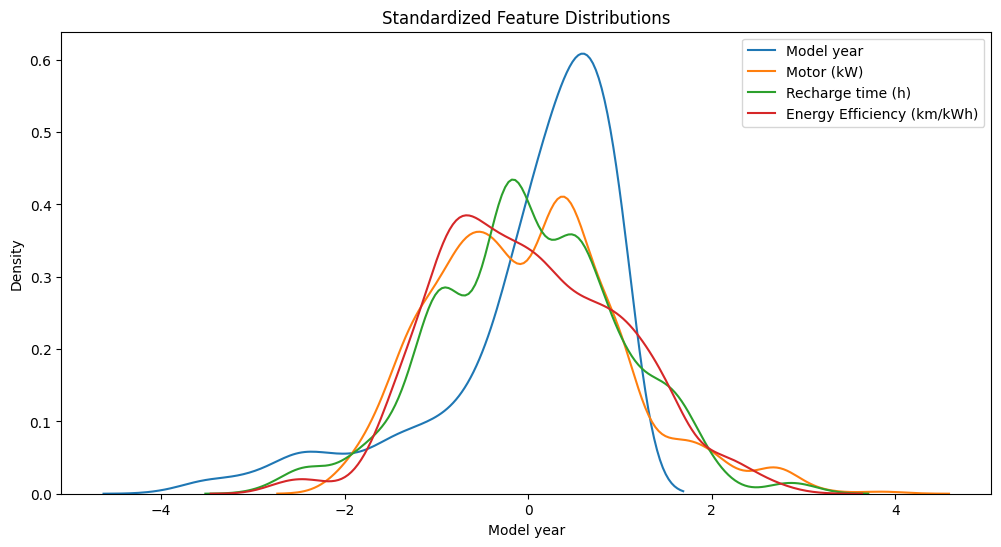

In [45]:
plt.figure(figsize=(12,6))
for col in numeric_cols:
    sns.kdeplot(scaled_df[col], label=col)

plt.title("Standardized Feature Distributions")
plt.legend()
plt.show()

## **🏷️ 4. Encoding Categorical Variables**

### **🔹 a) Label Encoding (for Tree-Based Models)**

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Vehicle_class_encoded"] = le.fit_transform(df["Vehicle class"])

### **📊 Encoded vs Original Comparison**

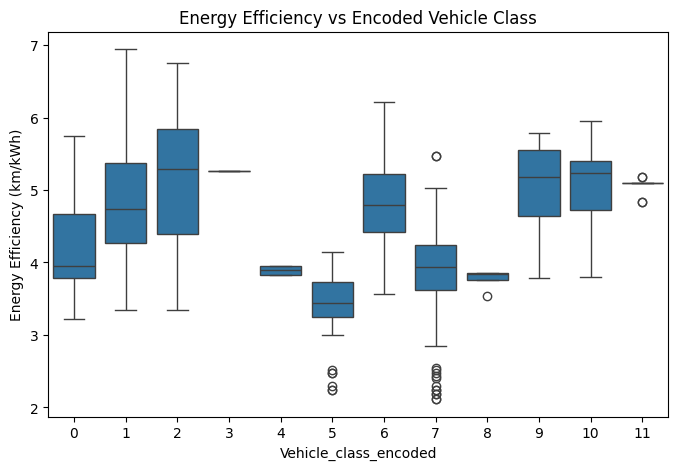

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Vehicle_class_encoded",
    y="Energy Efficiency (km/kWh)",
    data=df
)
plt.title("Energy Efficiency vs Encoded Vehicle Class")
plt.show()

### **🔹 b) One-Hot Encoding (for Linear Models)**

In [48]:
df_encoded = pd.get_dummies(
    df,
    columns=["Make", "Vehicle class"],
    drop_first=True
)

### **📊 Feature Explosion Visualization**

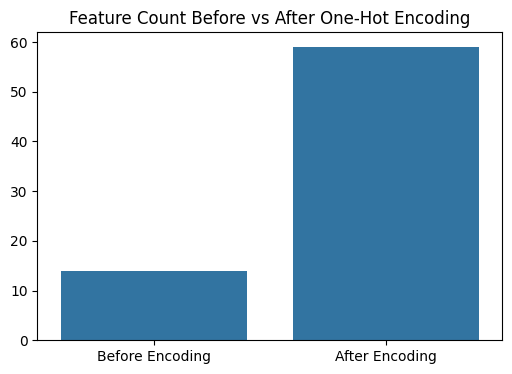

In [49]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=["Before Encoding", "After Encoding"],
    y=[df.shape[1], df_encoded.shape[1]]
)
plt.title("Feature Count Before vs After One-Hot Encoding")
plt.show()

## **🧠 5. Feature Importance Preview (Correlation-Based)**

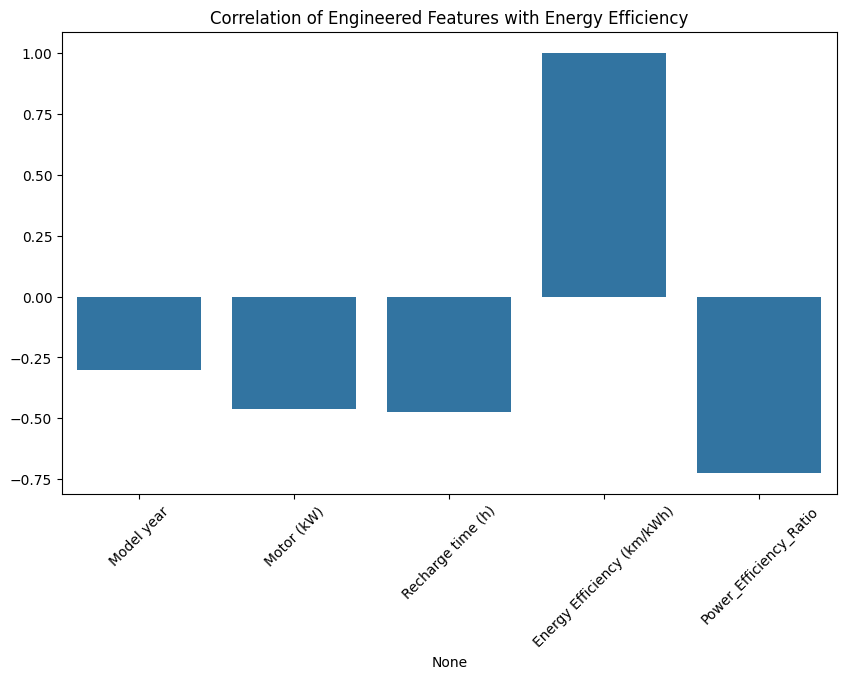

In [50]:
plt.figure(figsize=(10,6))
corr_target = df[numeric_cols + ["Power_Efficiency_Ratio"]].corr()["Energy Efficiency (km/kWh)"]

sns.barplot(
    x=corr_target.index,
    y=corr_target.values
)
plt.title("Correlation of Engineered Features with Energy Efficiency")
plt.xticks(rotation=45)
plt.show()

# **🔟 Data Distribution & Imbalance Check**

## **🎯 1. Target Variable Distribution**

### **Energy Efficiency (km/kWh)**

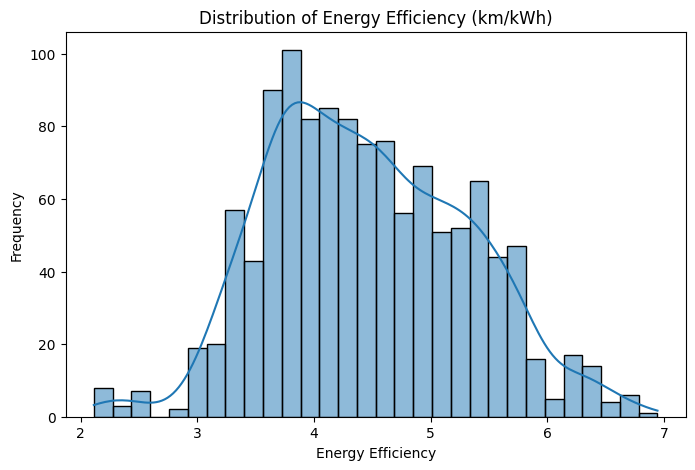

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(
    df["Energy Efficiency (km/kWh)"],
    bins=30,
    kde=True
)
plt.title("Distribution of Energy Efficiency (km/kWh)")
plt.xlabel("Energy Efficiency")
plt.ylabel("Frequency")
plt.show()

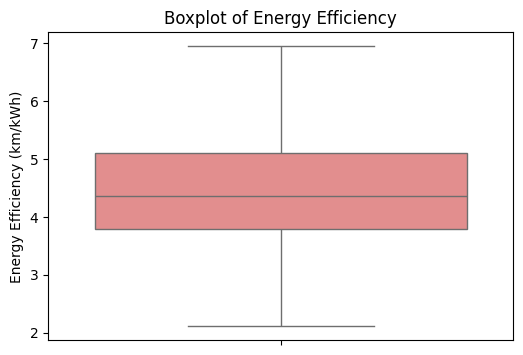

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df["Energy Efficiency (km/kWh)"], color="lightcoral")
plt.title("Boxplot of Energy Efficiency")
plt.show()

## **🔀 2. Classification View (Binning the Target)**

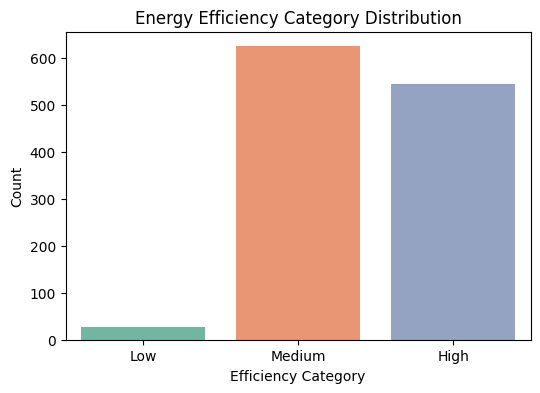

In [53]:
df["Efficiency_Category"] = pd.cut(
    df["Energy Efficiency (km/kWh)"],
    bins=[0, 3, 4.5, 7],
    labels=["Low", "Medium", "High"]
)

plt.figure(figsize=(6,4))
sns.countplot(
    x="Efficiency_Category",
    data=df,
    palette="Set2"
)
plt.title("Energy Efficiency Category Distribution")
plt.xlabel("Efficiency Category")
plt.ylabel("Count")
plt.show()

## **📐 3. Distribution of Continuous Features**

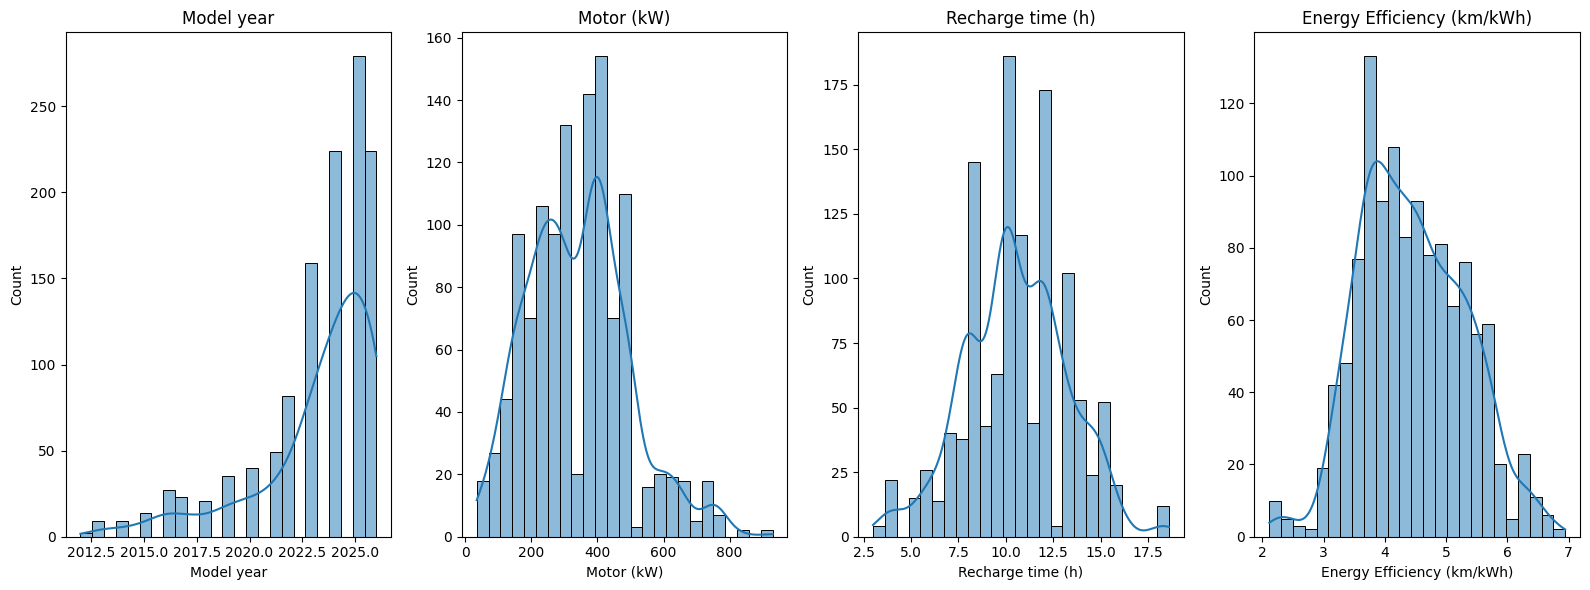

In [54]:
plt.figure(figsize=(16,6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1,4,i)
    sns.histplot(df[col], kde=True, bins=25)
    plt.title(col)

plt.tight_layout()
plt.show()

## **📊 4. Skewness & Kurtosis Analysis**

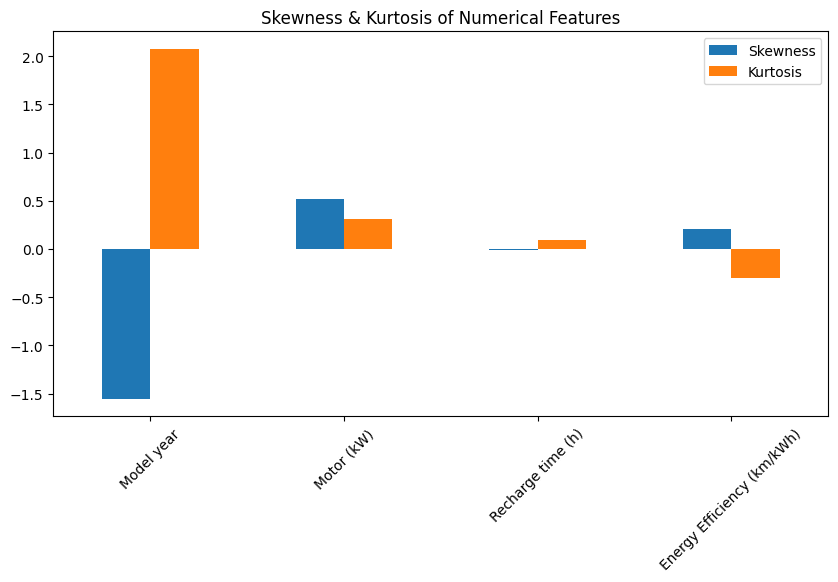

In [55]:
distribution_stats = pd.DataFrame({
    "Skewness": df[numeric_cols].skew(),
    "Kurtosis": df[numeric_cols].kurt()
})

distribution_stats

distribution_stats.plot(
    kind="bar",
    figsize=(10,5)
)
plt.title("Skewness & Kurtosis of Numerical Features")
plt.xticks(rotation=45)
plt.show()

## **🌊 5. Q–Q Plots (Normality Check)**

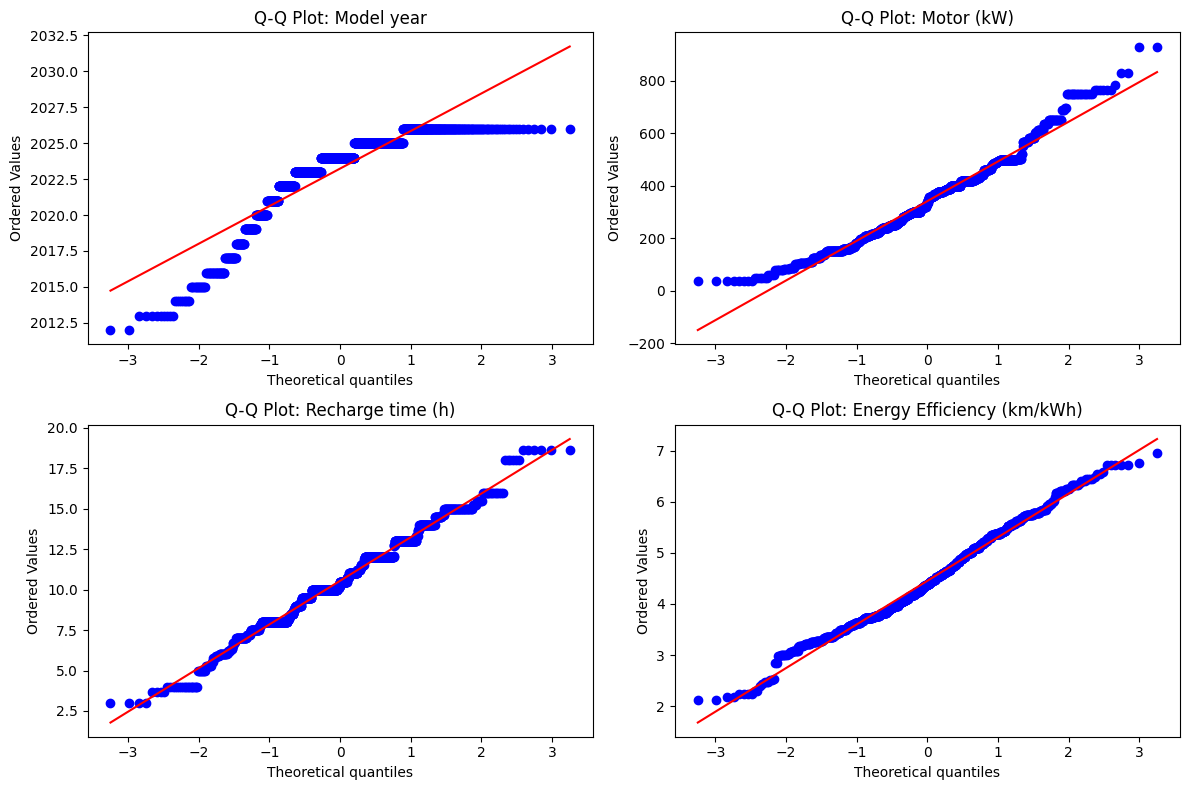

In [56]:
import scipy.stats as stats

plt.figure(figsize=(12,8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2,2,i)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {col}")

plt.tight_layout()
plt.show()

---

# **Thank You for Your Time**

Thank you for taking the time to explore this **Exploratory Data Analysis of EV Energy Efficiency in Canada**. I hope this notebook provided **clear insights**, meaningful visualizations, and a structured understanding of how different vehicle characteristics influence energy efficiency.

If you found this analysis helpful or informative: 
- 💬 Feel free to **share feedback or suggestions**  
- 🔁 Reuse the ideas for your own projects  

Your support and engagement are truly appreciated and help motivate the creation of more **high-quality, data-driven analyses**.

Happy Learning & Data Exploring! 🚀📊

---
